**SECTION 1 : DATA CLEANING & PREPARATION**

In [79]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#Reading my data

df = pd.read_csv('/Case Study Data - Kwanza Tukule.csv')
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [81]:
#Finding information about my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [82]:
#Inspecting the data for Missing values
df.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,8


The dataset had 8 null values in the Unit Price column. The below code, tries to match any entry in the data,whose Anonymized category, Anonymized Product and Anonymized business match any row in the null rows, populating the respective unit price.

In [83]:
#populating the null values in the Unit Price Column
# Creating a reference DataFrame for rows with UNIT PRICE values
reference_df = df.dropna(subset=['UNIT PRICE'])
# Function to populate UNIT PRICE based on matching rows
def populate_unit_price(row):
    if pd.isna(row['UNIT PRICE']):
        # Match based on ANONYMIZED CATEGORY, PRODUCT, and BUSINESS
        match = reference_df[
            (reference_df['ANONYMIZED CATEGORY'] == row['ANONYMIZED CATEGORY']) &
            (reference_df['ANONYMIZED PRODUCT'] == row['ANONYMIZED PRODUCT']) &
            (reference_df['ANONYMIZED BUSINESS'] == row['ANONYMIZED BUSINESS'])
        ]
        # If a match is found, return the UNIT PRICE from the reference
        if not match.empty:
            return match['UNIT PRICE'].values[0]
    return row['UNIT PRICE']

# Apply the function to populate missing UNIT PRICE values
df['UNIT PRICE'] = df.apply(populate_unit_price, axis=1)

# Display the updated DataFrame
print(df)

                             DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0        August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1        August 18, 2024, 9:32 PM        Category-120       Product-4156   
2        August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3        August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4        August 18, 2024, 9:32 PM        Category-119       Product-66e0   
...                           ...                 ...                ...   
333400   January 9, 2024, 8:49 PM        Category-119       Product-e98d   
333401   August 20, 2024, 8:24 PM        Category-106       Product-21f4   
333402   August 20, 2024, 8:24 PM         Category-76       Product-6e9c   
333403  October 10, 2024, 6:19 PM         Category-91       Product-523e   
333404  October 10, 2024, 6:19 PM         Category-75       Product-b31e   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0            Busi

In [84]:
df.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,5


After matching and prepopulating the null cells on the Unit Price Column, we still have 5 null cells.These, I will fill them with zero so that they do not skew my analysis, as below.


In [85]:
df['UNIT PRICE'] = df['UNIT PRICE'].fillna(0)

In [86]:
#Confirming that I no longer have Null values
df.isnull().sum()

,0
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,0


In [87]:
#Inspecting for duplicated values in the dataset
df.duplicated().sum()

3524

In [88]:
#Dropping duplicates
df.drop_duplicates(inplace = True)

In [89]:
#Confirming that I no longer have duplicated values
df.duplicated().sum()

0

In [90]:
#Fixing Inconsistent Data Types
df['QUANTITY'] = pd.to_numeric(df['QUANTITY'], errors='coerce').fillna(0)
df['UNIT PRICE'] = pd.to_numeric(df['UNIT PRICE'], errors='coerce').fillna(0)

In [91]:
# Convert the DATE column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])

<ipython-input-91-b1f4a3c7c6b5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [92]:
#Creating a month-year column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

**SECTION 2 : EXPLORATORY DATA ANALYSIS**

In [93]:
df.head(10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,0.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,0.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,0.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,0.0,August 2024
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,0.0,August 2024
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,0.0,August 2024
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,0.0,August 2024
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0,August 2024
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,0.0,August 2024


In [94]:
# Calculating the  total quantity and total value grouped by the two columns
result = df.groupby(['ANONYMIZED CATEGORY', 'ANONYMIZED BUSINESS']).agg(
    Total_Quantity=('QUANTITY','sum'),
    Total_Value=('UNIT PRICE', lambda x: sum(x*df.loc[x.index, 'QUANTITY']))
).reset_index()

print(result)

      ANONYMIZED CATEGORY ANONYMIZED BUSINESS  Total_Quantity  Total_Value
0            Category-100       Business-0000               1          0.0
1            Category-100       Business-00b7               2          0.0
2            Category-100       Business-016c              22          0.0
3            Category-100       Business-0197               2          0.0
4            Category-100       Business-0204               5          0.0
...                   ...                 ...             ...          ...
36166         Category-99       Business-fe3e               5       1630.0
36167         Category-99       Business-fe46              14       7785.0
36168         Category-99       Business-fe4b               7       4485.0
36169         Category-99       Business-fef1               6       3420.0
36170         Category-99       Business-ffff              14       8460.0

[36171 rows x 4 columns]


In [95]:
# Filter rows where 'Total Value' is 0.0
df[df['QUANTITY']==0]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
19828,2024-12-20 21:07:00,Category-113,Product-6342,Business-4305,Location-3e32,0,2.0,December 2024
48930,2024-06-02 10:18:00,Category-75,Product-4832,Business-195b,Location-c86b,0,0.0,June 2024
48931,2024-06-02 10:18:00,Category-75,Product-6aa1,Business-195b,Location-c86b,0,0.0,June 2024
48932,2024-06-02 10:18:00,Category-100,Product-f3ee,Business-195b,Location-c86b,0,0.0,June 2024
60118,2024-06-14 11:11:00,Category-120,Product-14f3,Business-1b8b,Location-c2f2,0,0.0,June 2024
63254,2024-05-09 14:06:00,Category-75,Product-8b33,Business-2592,Location-9149,0,0.0,May 2024
67161,2024-07-02 13:45:00,Category-78,Product-b409,Business-54ac,Location-e2f8,0,750.0,July 2024
90630,2024-06-07 21:06:00,Category-78,Product-b409,Business-5e1d,Location-d32a,0,750.0,June 2024
100956,2024-06-11 09:10:00,Category-120,Product-83fd,Business-5cac,Location-e2f8,0,0.0,June 2024
102391,2024-06-05 12:09:00,Category-105,Product-acb9,Business-af19,Location-4ea1,0,0.0,June 2024


In the above code, I have realised that there are some products whose quantity is zero. I was testing this to find out why I have values of 0.00 for Total Value, so that I know how to handle them.

<ipython-input-96-c7a9c1ec26bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED CATEGORY', y='Total_Quantity', data=result, palette='magma')


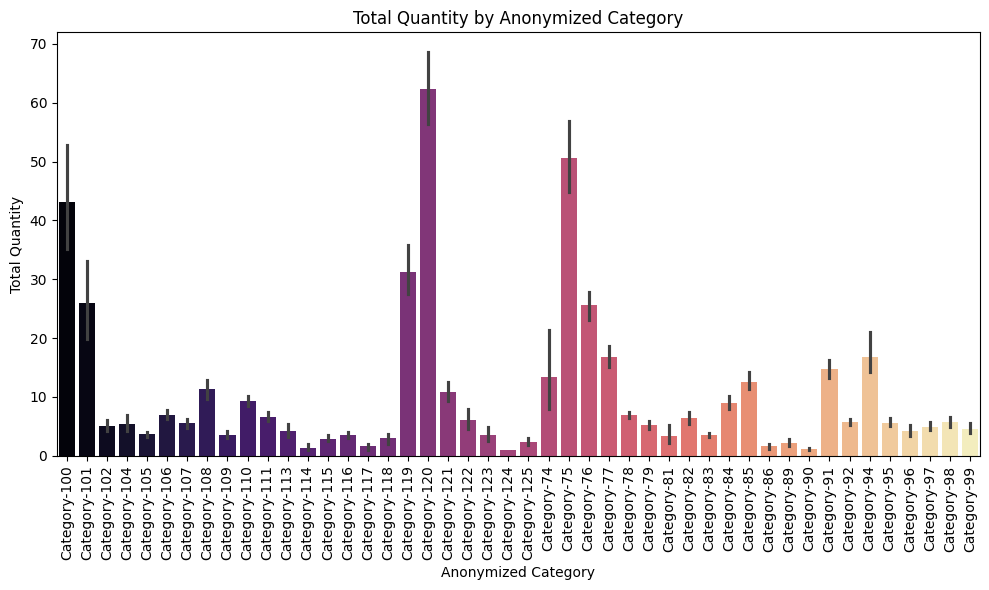

In [96]:
# Creating a Bar Graph: Total Quantity by ANONYMIZED CATEGORY
plt.figure(figsize=(10, 6))
sns.barplot(x='ANONYMIZED CATEGORY', y='Total_Quantity', data=result, palette='magma')
plt.title('Total Quantity by Anonymized Category')
plt.xlabel('Anonymized Category', fontsize=10)
plt.ylabel('Total Quantity', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-97-cec7d9f4237a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED BUSINESS', y= 'Total_Value', data = result, palette='magma')


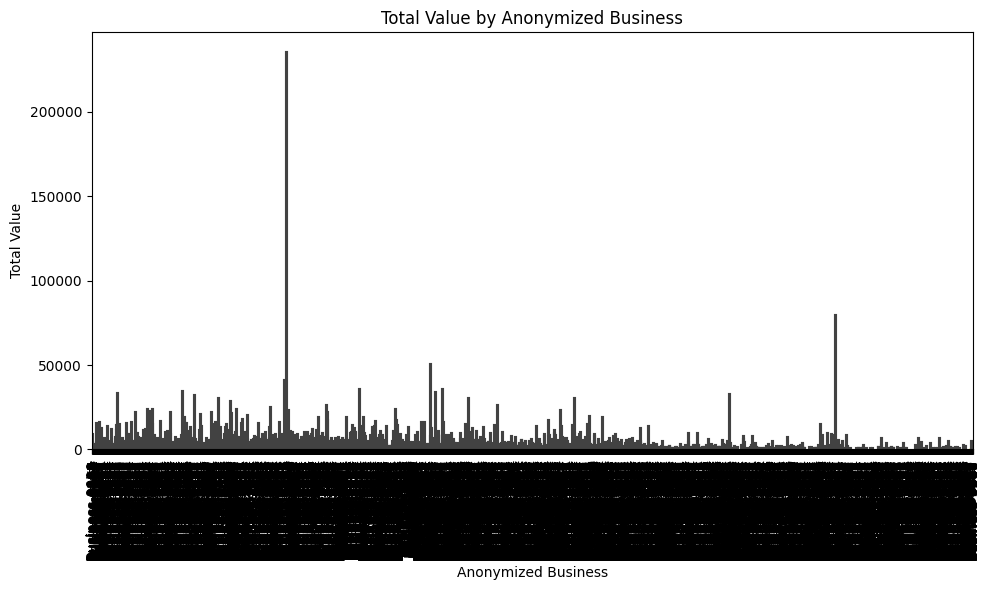

In [97]:
# Creating a bar graph of  Total Value by ANONYMIZED BUSINESS
plt.figure(figsize = (10,6) )
sns.barplot(x='ANONYMIZED BUSINESS', y= 'Total_Value', data = result, palette='magma')
plt.title('Total Value by Anonymized Business')
plt.xlabel('Anonymized Business', fontsize=10)
plt.ylabel('Total Value',fontsize=10)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<ipython-input-98-131059d3b05e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED CATEGORY', y= 'Total_Value', data = result, palette='magma')


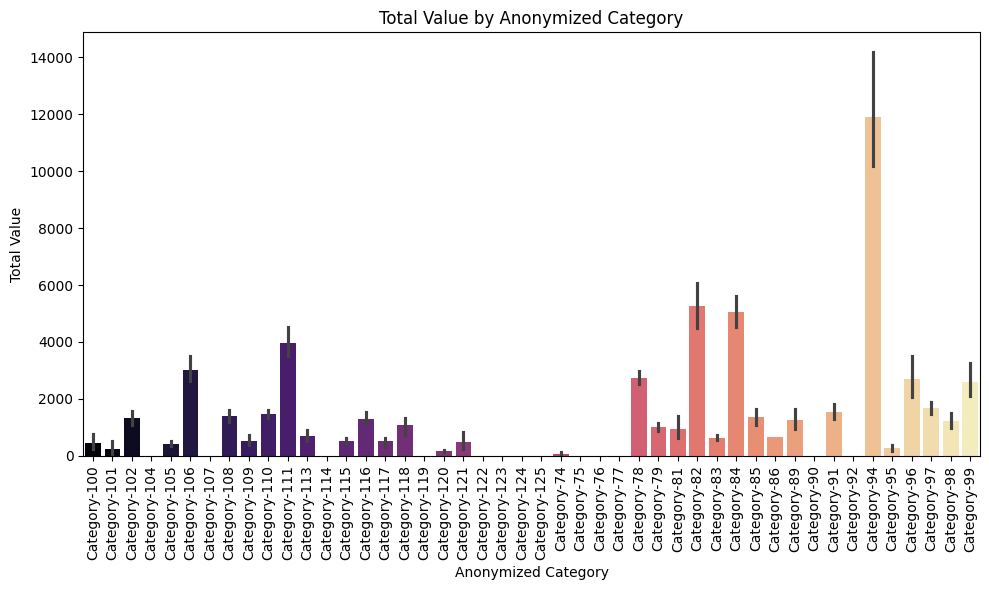

In [98]:
# Creating a bar graph of  Total Value by ANONYMIZED CATEGORY
plt.figure(figsize = (10,6) )
sns.barplot(x='ANONYMIZED CATEGORY', y= 'Total_Value', data = result, palette='magma')
plt.title('Total Value by Anonymized Category')
plt.xlabel('Anonymized Category', fontsize=10)
plt.ylabel('Total Value',fontsize=10)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<ipython-input-99-a6b2aeb6bb91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED BUSINESS', y='Total_Quantity', data=result, palette='coolwarm')


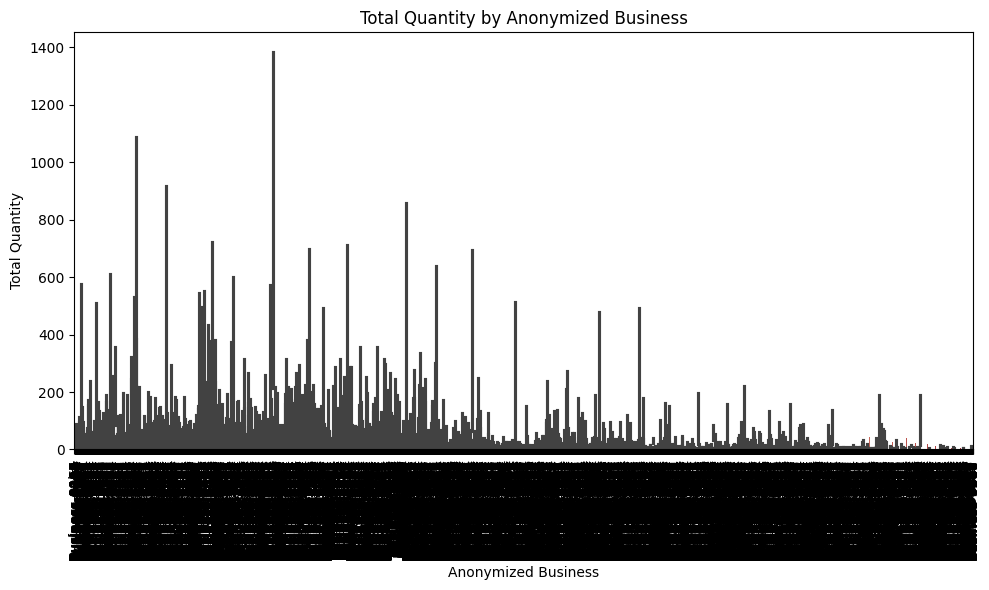

In [99]:
# Creating a Bar Graph: Total Quantity by ANONYMIZED BUSINESS
plt.figure(figsize=(10, 6))
sns.barplot(x='ANONYMIZED BUSINESS', y='Total_Quantity', data=result, palette='coolwarm')
plt.title('Total Quantity by Anonymized Business')
plt.xlabel('Anonymized Business', fontsize=10)
plt.ylabel('Total Quantity', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-100-91046a97c230>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_trends['Month-Year'] = pd.to_datetime(sales_trends['Month-Year'])


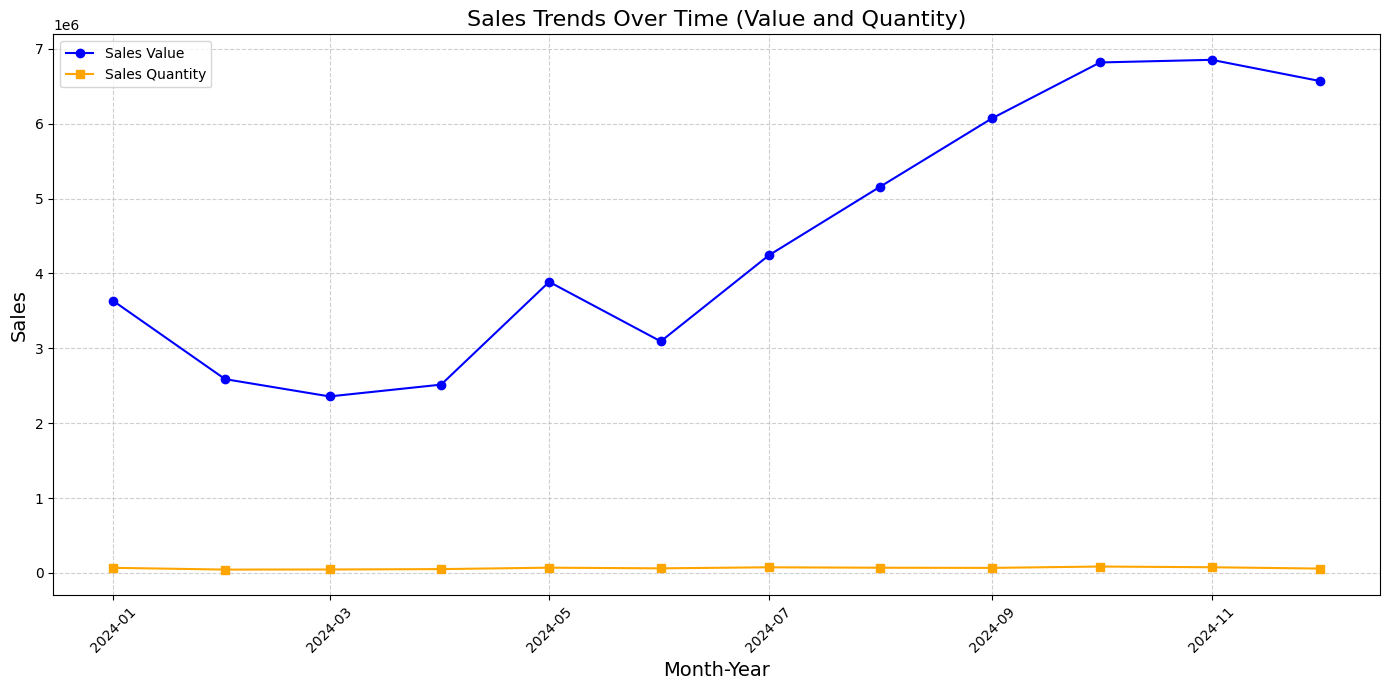

In [100]:
# Aggregate sales data by Month-Year
sales_trends = df.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY','sum'),
    Total_Value=('UNIT PRICE', lambda x: sum(x*df.loc[x.index, 'QUANTITY']))
).reset_index()
# Ensure Month-Year is in datetime format
sales_trends['Month-Year'] = pd.to_datetime(sales_trends['Month-Year'])
# Sort the DataFrame by Month-Year to ensure the order is correct
sales_trends = sales_trends.sort_values('Month-Year')

# Plotting the time series trends
plt.figure(figsize=(14, 7))

# Plot Sales Value
plt.plot(sales_trends['Month-Year'], sales_trends['Total_Value'], marker='o', label='Sales Value', color='blue')

# Plot Sales Quantity
plt.plot(sales_trends['Month-Year'], sales_trends['Total_Quantity'], marker='s', label='Sales Quantity', color='orange')

# Plot decorations
plt.title('Sales Trends Over Time (Value and Quantity)', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


**Performance Analysis**

In [101]:
# Identifying the top 5 most frequently purchased products based on Quantity
top_products = df.groupby('ANONYMIZED PRODUCT').agg({'QUANTITY': 'sum'})
top_products = top_products.sort_values(by='QUANTITY', ascending=False).head(5)
print(top_products)


                    QUANTITY
ANONYMIZED PRODUCT          
Product-66e0           46957
Product-e805           42602
Product-8f75           37566
Product-29ee           35940
Product-4156           28487


In [102]:
#Identifying the top 5 most valuable products (based on Value).
top_valuable_products = df.groupby('ANONYMIZED PRODUCT').agg(
    Total_Value=('UNIT PRICE', lambda x: sum(x*df.loc[x.index, 'QUANTITY']))
)
top_valuable_products = top_valuable_products.sort_values(by='Total_Value', ascending=False).head(5)
print(top_valuable_products)

                    Total_Value
ANONYMIZED PRODUCT             
Product-3d7f          5745920.0
Product-703d          4598970.0
Product-91f3          3912806.0
Product-b409          3422340.0
Product-9c81          2363320.0


**ADVANCED ANALYSIS**

In [103]:
# Performing segmentation analysis based on purchasing behavior
business_segmentation = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),  # Total quantity purchased
    Total_Value=('UNIT PRICE', lambda x: sum(x * df.loc[x.index, 'QUANTITY'])),  # Total value contributed
    Transaction_Frequency= ('Month-Year', 'count'),
    First_Transaction_Date=('DATE', 'min'),  # First transaction date
    Last_Transaction_Date=('DATE', 'max')   # Last transaction date
).reset_index()

# Display segmentation results
print("Business Segmentation Analysis:")
print(business_segmentation.sort_values(by=['Total_Value', 'Total_Quantity'], ascending=False))

Business Segmentation Analysis:
     ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Transaction_Frequency  \
2906       Business-978e           13991    1729770.0                   2614   
2868       Business-9540            1496     495931.0                    914   
1555       Business-4fee            2036     478338.0                   1290   
1857       Business-5fc7            1546     304996.0                    836   
3420       Business-b477            1273     288638.0                    506   
...                  ...             ...          ...                    ...   
4690       Business-fa63               1          0.0                      1   
4694       Business-fa77               1          0.0                      1   
4700       Business-fac9               1          0.0                      1   
4724       Business-fbc6               1          0.0                      1   
4727       Business-fbd2               1          0.0                      1   

     Fi

In [104]:
# Classifying  businesses into 3 value-based groups
business_segmentation['Value_Segment'] = pd.cut(
    business_segmentation['Total_Value'],
    bins=3,
    labels=['Low Value', 'Medium Value', 'High Value']
)

# Displaying segmented data
print("Business Segmentation with Value Groups:")
print(business_segmentation[['ANONYMIZED BUSINESS', 'Total_Value', 'Value_Segment',]])


Business Segmentation with Value Groups:
     ANONYMIZED BUSINESS  Total_Value Value_Segment
0          Business-0000        365.0     Low Value
1          Business-0005          0.0     Low Value
2          Business-0029          0.0     Low Value
3          Business-003d      11390.0     Low Value
4          Business-0072      15773.0     Low Value
...                  ...          ...           ...
4795       Business-ffa9        820.0     Low Value
4796       Business-ffae       1280.0     Low Value
4797       Business-ffb1      73284.0     Low Value
4798       Business-ffd2       6483.0     Low Value
4799       Business-ffff      36475.0     Low Value

[4800 rows x 3 columns]


**Recommendations**

High vale business should be retained, as they bring in more revenue. Tabs should be kept on such , to keep pace with their needs, their painpoints and how to alievate them, opportunities to improve their interaction as well as introduce loyalty programs to them.

The company should see how best they can add value to middle level business because, and hence transition them into high value business.


**FORECASTING**
From the trendline in the data, above, ARIMA is the best forecasting method I will chose to apply on this dataset. This is because I observed some seasonality in the data, and I would like to all the historical data to have same weightage on my future forecast.

In [105]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
print(business_segmentation.columns)


Index(['ANONYMIZED BUSINESS', 'Total_Quantity', 'Total_Value',
       'Transaction_Frequency', 'First_Transaction_Date',
       'Last_Transaction_Date', 'Value_Segment'],
      dtype='object')


In [107]:

# Ensuring the date columns are in datetime format
business_segmentation['Last_Transaction_Date'] = pd.to_datetime(business_segmentation['Last_Transaction_Date'])



In [108]:
# Set the date column as the index
business_segmentation = business_segmentation.set_index('Last_Transaction_Date')


In [109]:
# Aggregating sales data by month
monthly_sales = business_segmentation['Total_Value'].resample('M').sum()


<ipython-input-109-7a46e48a58f1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = business_segmentation['Total_Value'].resample('M').sum()


In [110]:
# Fiting the ARIMA model
model = ARIMA(monthly_sales)
model_fit = model.fit()



In [111]:
# Forecasting for the next 3 months
forecast = model_fit.forecast(steps=3)
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')


<ipython-input-111-6db90beae2df>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')


In [112]:
# Displaying forecast
forecast_series = pd.Series(forecast, index=forecast_index)
print("Sales Forecast for the Next 3 Months:")
print(forecast_series)

Sales Forecast for the Next 3 Months:
2025-01-31    4.481646e+06
2025-02-28    4.481646e+06
2025-03-31    4.481646e+06
Freq: ME, Name: predicted_mean, dtype: float64


**ANOMALY DETECTION**

Between April and May of 2024, there was a steep spike in sales.This could be attributed to the period being a back to school season, in the Kenyan academic calendar.

Similiarly, between January and February, there is an observed steep drop in sales, likely to be attributed to the populance limited disposable income, having just come from the Christmas and New year festive seasons.

**CORRELATION ANALYSIS**

In [113]:
# Correlation between Quantity and Value
correlation = business_segmentation[['Total_Quantity', 'Total_Value']].corr()
print(correlation)

                Total_Quantity  Total_Value
Total_Quantity        1.000000     0.680656
Total_Value           0.680656     1.000000


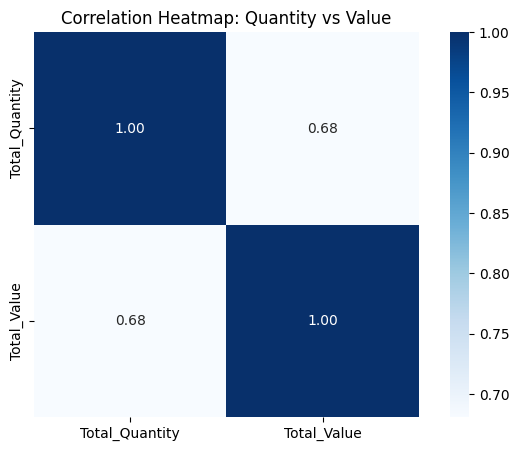

In [114]:
# Visualizing the correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap: Quantity vs Value')
plt.show()


There is a moderately high correlation between qauntity and value. This means that a higher qauntity of product translates into high total value derived from that product.

Sales performance is driven by
1. Employee satisfaction - when employees feel seen, heard and well appreciated at work, it motivates them into pushing the sales needle her.
2. Product quality - high quality products tend to attract a good market rapport hence improvibg its demand, translating into more sales.
3. Pricing - Based on the market segmentation, highly priced products in low incomme areas do not more as quickly as would moderately/lowly priced products.
4. Product market support - Programs such as promotions and loyalty programs aid in pushing product sales in the market.

**SECTION 4 : STRATEGIC INSIGHTS AND RECOMEMNDATIONS**

Category 94 should be prioritized in marketing campaings since it drives the highest revenue. A focused campaign could further amplify its strong performance and increase its sales volumes.







In [122]:
from google.colab import files

In [123]:
# Save the DataFrame to an Excel file
df.to_excel('Kwanza Tukule.xlsx', index=False)

In [124]:
# Download the file
files.download('Kwanza Tukule.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>